In [16]:
from preprocessing.preprocessing_label_encoding import  get_preprocessed_brfss_dataset_label_encoded_train_test_split, get_preprocessed_brfss_dataset_label_encoded_train_test_split_undersampled, get_preprocessed_brfss_dataset_label_encoded_train_test_split_oversampled

from sklearn.metrics import accuracy_score, fbeta_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn import tree
from IPython.core.display_functions import display

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data_train, data_validation, data_test, target_train, target_validation, target_test = get_preprocessed_brfss_dataset_label_encoded_train_test_split(include_test_data=True)
data_train.head(10)

,GenHealth,PhysHealth,MentHealth,Healthcare,MedCost,Checkup,HighBP,HighChol,HeartAttack,AngiCoro,...,Height,Weight,BMI,Education,Alcohol,Smoking,FruitCons,VegetCons,PhysActivity,Muscles
241445,3.0,0.0,0.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,0.855895,0.469484,4.0,3.0,1.0,3.0,2.0,1.0,3.0,2.0
107433,3.0,0.0,0.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,0.764192,0.392789,4.0,3.0,1.0,4.0,2.0,1.0,4.0,2.0
255533,2.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,0.855895,0.445989,4.0,3.0,1.0,4.0,1.0,2.0,3.0,1.0
31855,1.0,0.0,0.0,1.0,2.0,1.0,3.0,2.0,2.0,2.0,...,0.685590,0.203450,2.0,4.0,1.0,4.0,1.0,1.0,3.0,1.0
76133,2.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,...,0.698690,0.219079,2.0,4.0,1.0,4.0,1.0,1.0,1.0,1.0
93828,2.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,...,0.799127,0.289495,3.0,3.0,1.0,2.0,2.0,1.0,1.0,2.0
71236,2.0,0.0,0.0,1.0,2.0,2.0,3.0,2.0,2.0,2.0,...,0.742358,0.258203,3.0,2.0,1.0,4.0,2.0,1.0,1.0,2.0
212026,3.0,0.1,0.0,1.0,2.0,1.0,3.0,2.0,2.0,2.0,...,0.698690,0.234742,3.0,3.0,1.0,1.0,2.0,1.0,2.0,1.0
169431,3.0,1.0,0.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,0.777293,0.336450,4.0,4.0,1.0,3.0,2.0,2.0,3.0,2.0
60906,1.0,0.0,0.0,1.0,2.0,2.0,3.0,2.0,2.0,2.0,...,0.711790,0.211247,2.0,3.0,1.0,3.0,1.0,1.0,1.0,2.0


In [5]:
def validate_decision_tree_classifier(estimator: DecisionTreeClassifier):
    estimator.fit(data_train, target_train)
    predictions = estimator.predict(data_validation)
    return accuracy_score(target_validation, predictions), fbeta_score(target_validation, predictions, beta=2), precision_score(target_validation, predictions), recall_score(target_validation, predictions)

In [6]:
max_depth_parameters = range(2, 28)
for param in max_depth_parameters:
    estimator = DecisionTreeClassifier(class_weight="balanced", max_depth=param)
    accuracy, f_score, precision, recall = validate_decision_tree_classifier(estimator)
    print(f"Max depth {param} --> Accuracy: {accuracy}, F-Score: {f_score}, Precision: {precision}, Recall: {recall}")

Max depth 2 --> Accuracy: 0.785287952534906, F-Score: 0.5151322302361759, Precision: 0.32068965517241377, Recall: 0.6071676621753022
Max depth 3 --> Accuracy: 0.6384694638860269, F-Score: 0.5608254285238807, Precision: 0.2399050820644651, Recall: 0.8426170301430754
Max depth 4 --> Accuracy: 0.702792482324937, F-Score: 0.5745116952013505, Precision: 0.27270125906142695, Recall: 0.7942769829142936
Max depth 5 --> Accuracy: 0.6572814154261556, F-Score: 0.5805700552029742, Precision: 0.2528002616302837, Recall: 0.8590081955827198
Max depth 6 --> Accuracy: 0.6997370945393825, F-Score: 0.58792562278994, Precision: 0.27476557422709125, Recall: 0.8221975274343659
Max depth 7 --> Accuracy: 0.698973247592994, F-Score: 0.5952122086702117, Precision: 0.2763526226423753, Recall: 0.8365050701486317
Max depth 8 --> Accuracy: 0.7197036984403311, F-Score: 0.5963246679162253, Precision: 0.288544952681388, Recall: 0.8131684956243923
Max depth 9 --> Accuracy: 0.7132021174547909, F-Score: 0.595761856710393

In [8]:
criterion_parameter = ["gini", "entropy", "log_loss"]
for param in criterion_parameter:
    estimator = DecisionTreeClassifier(class_weight="balanced", max_depth=8, criterion=param)
    accuracy, f_score, precision, recall = validate_decision_tree_classifier(estimator)
    print(f"Criterion {param} --> Accuracy: {accuracy}, F-Score: {f_score}, Precision: {precision}, Recall: {recall}")

Criterion gini --> Accuracy: 0.7196681706753828, F-Score: 0.5963003707778184, Precision: 0.28851651059635286, Recall: 0.8131684956243923
Criterion entropy --> Accuracy: 0.7183536433722955, F-Score: 0.594860212428275, Precision: 0.2873218673218673, Recall: 0.812196138352549
Criterion log_loss --> Accuracy: 0.7183714072547696, F-Score: 0.5948723166141011, Precision: 0.2873359870263895, Recall: 0.812196138352549


In [9]:
splitter_parameter = ["best", "random"]
for param in splitter_parameter:
    estimator = DecisionTreeClassifier(class_weight="balanced", max_depth=8, criterion="gini", splitter=param)
    accuracy, f_score, precision, recall = validate_decision_tree_classifier(estimator)
    print(f"Criterion {param} --> Accuracy: {accuracy}, F-Score: {f_score}, Precision: {precision}, Recall: {recall}")

Criterion best --> Accuracy: 0.719685934557857, F-Score: 0.5963125190995213, Precision: 0.2885307309379467, Recall: 0.8131684956243923
Criterion random --> Accuracy: 0.6886346679930365, F-Score: 0.5890397577415258, Precision: 0.2693286881950958, Recall: 0.837616335602167


In [10]:
min_samples_split_parameter = range(5, 1000)
best_param = [0,0]
for param in min_samples_split_parameter:
    estimator = DecisionTreeClassifier(class_weight="balanced", max_depth=8, criterion="gini", min_samples_split=param)
    accuracy, f_score, precision, recall = validate_decision_tree_classifier(estimator)
    if f_score > best_param[0]:
        best_param[0] = f_score
        best_param[1] = param
    print(f"Minimum samples for split {param} --> Accuracy: {accuracy}, F-Score: {f_score}, Precision: {precision}, Recall: {recall}")

print(f"Best min_samples_split: {best_param[1]} with f2-score {best_param[0]}")

Minimum samples for split 5 --> Accuracy: 0.7196681706753828, F-Score: 0.5963003707778184, Precision: 0.28851651059635286, Recall: 0.8131684956243923
Minimum samples for split 6 --> Accuracy: 0.719685934557857, F-Score: 0.5963125190995213, Precision: 0.2885307309379467, Recall: 0.8131684956243923
Minimum samples for split 7 --> Accuracy: 0.7196681706753828, F-Score: 0.5963003707778184, Precision: 0.28851651059635286, Recall: 0.8131684956243923
Minimum samples for split 8 --> Accuracy: 0.719685934557857, F-Score: 0.5963125190995213, Precision: 0.2885307309379467, Recall: 0.8131684956243923
Minimum samples for split 9 --> Accuracy: 0.719685934557857, F-Score: 0.5963125190995213, Precision: 0.2885307309379467, Recall: 0.8131684956243923
Minimum samples for split 10 --> Accuracy: 0.719685934557857, F-Score: 0.5963125190995213, Precision: 0.2885307309379467, Recall: 0.8131684956243923
Minimum samples for split 11 --> Accuracy: 0.719685934557857, F-Score: 0.5963125190995213, Precision: 0.288

In [12]:
min_samples_leaf_parameter = range(5, 1000)
best_param = [0,0]
for param in min_samples_leaf_parameter:
    estimator = DecisionTreeClassifier(class_weight="balanced", max_depth=8, criterion="gini", min_samples_split=760, min_samples_leaf=param)
    accuracy, f_score, precision, recall = validate_decision_tree_classifier(estimator)
    if f_score > best_param[0]:
        best_param[0] = f_score
        best_param[1] = param
    print(f"Minimum samples for leaf {param} --> Accuracy: {accuracy}, F-Score: {f_score}, Precision: {precision}, Recall: {recall}")

print(f"Best min_samples_leaf: {best_param[1]} with f2-score {best_param[0]}")

Minimum samples for leaf 5 --> Accuracy: 0.7246065300031975, F-Score: 0.5971236305444996, Precision: 0.2918379624987466, Recall: 0.8085845256285595
Minimum samples for leaf 6 --> Accuracy: 0.7245887661207233, F-Score: 0.5971113800956035, Precision: 0.2918233318293478, Recall: 0.8085845256285595
Minimum samples for leaf 7 --> Accuracy: 0.7246420577681458, F-Score: 0.5971481329503487, Precision: 0.2918672282390694, Recall: 0.8085845256285595
Minimum samples for leaf 8 --> Accuracy: 0.7246598216506199, F-Score: 0.5971603849073637, Precision: 0.29188186331043475, Recall: 0.8085845256285595
Minimum samples for leaf 9 --> Accuracy: 0.7246598216506199, F-Score: 0.5971603849073637, Precision: 0.29188186331043475, Recall: 0.8085845256285595
Minimum samples for leaf 10 --> Accuracy: 0.7246598216506199, F-Score: 0.5971603849073637, Precision: 0.29188186331043475, Recall: 0.8085845256285595
Minimum samples for leaf 11 --> Accuracy: 0.7246598216506199, F-Score: 0.5971603849073637, Precision: 0.2918

Validate best model against undersampling/oversampling

In [13]:
data_train, data_validation, data_test, target_train, target_validation, target_test = get_preprocessed_brfss_dataset_label_encoded_train_test_split_undersampled(include_test_data=True)
estimator = DecisionTreeClassifier(class_weight="balanced", max_depth=8, criterion="gini", min_samples_split=760, min_samples_leaf=219)
accuracy, f_score, precision, recall = validate_decision_tree_classifier(estimator)
print(f"Best model  --> Accuracy: {accuracy}, F-Score: {f_score}, Precision: {precision}, Recall: {recall}")

Best model  --> Accuracy: 0.7095782854300636, F-Score: 0.5911706708519459, Precision: 0.2811214237871974, Recall: 0.8162244756216142


In [14]:
data_train, data_validation, data_test, target_train, target_validation, target_test = get_preprocessed_brfss_dataset_label_encoded_train_test_split_oversampled(include_test_data=True)
estimator = DecisionTreeClassifier(class_weight="balanced", max_depth=8, criterion="gini", min_samples_split=760, min_samples_leaf=219)
accuracy, f_score, precision, recall = validate_decision_tree_classifier(estimator)
print(f"Best model with oversampling --> Accuracy: {accuracy}, F-Score: {f_score}, Precision: {precision}, Recall: {recall}")

Best model with oversampling --> Accuracy: 0.7034497459764806, F-Score: 0.5960739075956164, Precision: 0.2790113112693758, Recall: 0.8326156410612585


Validate model on test data

In [20]:
data_train, data_validation, data_test, target_train, target_validation, target_test = get_preprocessed_brfss_dataset_label_encoded_train_test_split(include_test_data=True)

estimator = DecisionTreeClassifier(class_weight="balanced", max_depth=8, criterion="gini", min_samples_split=760, min_samples_leaf=219)
estimator.fit(data_train, target_train)
predictions = estimator.predict(data_test)

accuracy, f_score, precision, recall = accuracy_score(target_test, predictions), fbeta_score(target_test, predictions, beta=2), precision_score(target_test, predictions), recall_score(target_test, predictions)
print(f"Model performance on test data --> Accuracy: {accuracy}, F-Score: {f_score}, Precision: {precision}, Recall: {recall}")

Model performance on test data --> Accuracy: 0.7214495070610178, F-Score: 0.5947951590481642, Precision: 0.28921471172962226, Recall: 0.8083067092651757


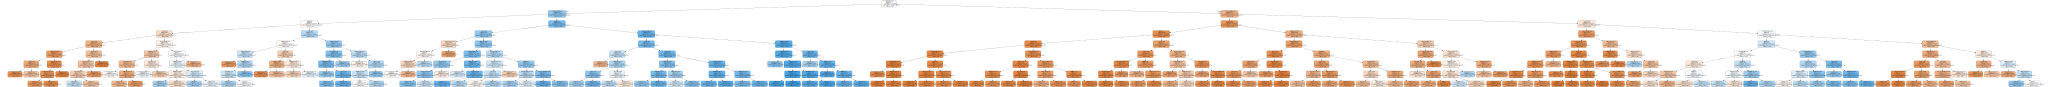

In [21]:
from preprocessing.preprocessing import diabetes_columns

dot_data = tree.export_graphviz(estimator, out_file=None,
                                feature_names=data_train.columns,
                                class_names=diabetes_columns,
                                filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
display(graph)